In [1]:
import numpy as np


In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt


In [6]:
from google.colab import files

In [64]:
uploaded=files.upload()

Saving garments_worker_productivity.csv to garments_worker_productivity (1).csv


In [4]:
data=pd.read_csv("garments_worker_productivity.csv", delimiter=",")


In [5]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


De modo preliminar podemos observar que la variable "wip" (Work in Progress), posee datos faltantes.

In [6]:
data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

Se ha procedido a identificar aquellas variables que no son numéricas, para su posterior exclusión.

In [7]:
data=data.select_dtypes(include=["float64","int64"])

In [8]:
data

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


La base da datos final, con la que se trabajará, tiene 11 variables, y todas tienen el carácter de ser numéricas.

In [9]:
print("Tengo N=", len(data), "instancias")

Tengo N= 1197 instancias


In [10]:
print("Tengo N=", len(data.columns),"atributos")

Tengo N= 11 atributos


In [11]:
perdido=data[data.isna().any(axis=1)]

In [12]:
print ("Tengo N=",len(perdido),"datos perdidos")

Tengo N= 506 datos perdidos


In [13]:
data.isnull().sum()

team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Se ha verificado que únicamente la variable "wip" tiene 506 datos faltantes de 1197 observaciones, lo que equivale al 42% de las observaciones. 

In [14]:
length = len(data)
for i in data.columns[:-3]:
    num = int(np.random.randint(0,95)/100*length)
    idx_replace = np.random.randint(0, length-1, num)
    data.loc[idx_replace, i] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Se han generado aleatoriamente datos faltantes en otras variables de la base de datos, de modo que la nueva base de datos se visualiza de la siguiente forma:

In [15]:
data

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,NaN,NaN,26.16,NaN,7080.0,NaN,NaN,NaN,0,59.0,0.940725
1,1.0,0.75,NaN,NaN,NaN,0.0,0.0,0.0,0,8.0,0.886500
2,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,30.5,0.800570
3,12.0,0.80,11.41,968.0,NaN,NaN,NaN,NaN,0,30.5,0.800570
4,6.0,NaN,25.90,NaN,NaN,50.0,NaN,0.0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
1192,NaN,NaN,NaN,NaN,960.0,NaN,0.0,0.0,0,8.0,0.628333
1193,NaN,NaN,NaN,NaN,960.0,NaN,NaN,0.0,0,8.0,0.625625
1194,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,8.0,0.625625
1195,NaN,0.75,2.90,NaN,NaN,0.0,NaN,0.0,0,15.0,0.505889


In [16]:
data.isnull().sum()

team                     622
targeted_productivity    500
smv                      626
wip                      898
over_time                690
incentive                582
idle_time                590
idle_men                 159
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

De este modo, se ha observado que de las 11 variables de la base, 8 de ellas tienen datos faltantes. Teniendo en cuenta que la variable "wip" era la que en principio poseía datos faltantes y es la que más tiene datos faltantes, se procederá a completar esta variable.

In [17]:
data["wip"].describe()  #Caracteriza la variable

count      299.000000
mean      1157.197324
std       1554.678099
min          7.000000
25%        758.000000
50%       1039.000000
75%       1232.500000
max      21385.000000
Name: wip, dtype: float64

In [18]:
data2=data.copy()
data3=data.copy()

**Imputación de Datos Faltantes**

Para gestionar aquellos datos faltantes, se procederá a través de 4 métodos y se escogerá aquel que más se ajuste a los datos originales.

In [19]:
def impute_nan_meanmedian(df, variable, value):
    if value=="median":
        val=df[variable].median()
    if value=="mean":
        val=df[variable].mean()
    df[variable+"_"+value]=df[variable].fillna(val)
    return df
import random
def rand_float_range(start, end):
    return random.random() * (end - start) + start

def impute_nan_random(df, variable, value=-9):
    if value!=-9:
        df[variable+"_random_fixed"]=df[variable].fillna(value)
    else:
        start,end=df[variable].min(),df[variable].max()
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
    return df

*Imputación a través de la Media*

In [20]:
impute_nan_meanmedian(data2, "wip", "mean")

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,wip_mean
0,NaN,NaN,26.16,NaN,7080.0,NaN,NaN,NaN,0,59.0,0.940725,1157.197324
1,1.0,0.75,NaN,NaN,NaN,0.0,0.0,0.0,0,8.0,0.886500,1157.197324
2,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,30.5,0.800570,1157.197324
3,12.0,0.80,11.41,968.0,NaN,NaN,NaN,NaN,0,30.5,0.800570,968.000000
4,6.0,NaN,25.90,NaN,NaN,50.0,NaN,0.0,0,56.0,0.800382,1157.197324
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,NaN,NaN,NaN,NaN,960.0,NaN,0.0,0.0,0,8.0,0.628333,1157.197324
1193,NaN,NaN,NaN,NaN,960.0,NaN,NaN,0.0,0,8.0,0.625625,1157.197324
1194,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,8.0,0.625625,1157.197324
1195,NaN,0.75,2.90,NaN,NaN,0.0,NaN,0.0,0,15.0,0.505889,1157.197324


*Imputación a través de la Mediana*

In [21]:
impute_nan_meanmedian(data2, "wip", "median")

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,wip_mean,wip_median
0,NaN,NaN,26.16,NaN,7080.0,NaN,NaN,NaN,0,59.0,0.940725,1157.197324,1039.0
1,1.0,0.75,NaN,NaN,NaN,0.0,0.0,0.0,0,8.0,0.886500,1157.197324,1039.0
2,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,30.5,0.800570,1157.197324,1039.0
3,12.0,0.80,11.41,968.0,NaN,NaN,NaN,NaN,0,30.5,0.800570,968.000000,968.0
4,6.0,NaN,25.90,NaN,NaN,50.0,NaN,0.0,0,56.0,0.800382,1157.197324,1039.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,NaN,NaN,NaN,NaN,960.0,NaN,0.0,0.0,0,8.0,0.628333,1157.197324,1039.0
1193,NaN,NaN,NaN,NaN,960.0,NaN,NaN,0.0,0,8.0,0.625625,1157.197324,1039.0
1194,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,8.0,0.625625,1157.197324,1039.0
1195,NaN,0.75,2.90,NaN,NaN,0.0,NaN,0.0,0,15.0,0.505889,1157.197324,1039.0


*Imputación de datos arbitrario*

In [22]:
impute_nan_random(data2,"wip",1258)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,wip_mean,wip_median,wip_random_fixed
0,NaN,NaN,26.16,NaN,7080.0,NaN,NaN,NaN,0,59.0,0.940725,1157.197324,1039.0,1258.0
1,1.0,0.75,NaN,NaN,NaN,0.0,0.0,0.0,0,8.0,0.886500,1157.197324,1039.0,1258.0
2,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,30.5,0.800570,1157.197324,1039.0,1258.0
3,12.0,0.80,11.41,968.0,NaN,NaN,NaN,NaN,0,30.5,0.800570,968.000000,968.0,968.0
4,6.0,NaN,25.90,NaN,NaN,50.0,NaN,0.0,0,56.0,0.800382,1157.197324,1039.0,1258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,NaN,NaN,NaN,NaN,960.0,NaN,0.0,0.0,0,8.0,0.628333,1157.197324,1039.0,1258.0
1193,NaN,NaN,NaN,NaN,960.0,NaN,NaN,0.0,0,8.0,0.625625,1157.197324,1039.0,1258.0
1194,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,8.0,0.625625,1157.197324,1039.0,1258.0
1195,NaN,0.75,2.90,NaN,NaN,0.0,NaN,0.0,0,15.0,0.505889,1157.197324,1039.0,1258.0


*Imputación de datos aleatorios*

In [23]:
impute_nan_random(data2,"wip",-9)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,wip_mean,wip_median,wip_random_fixed,wip_random
0,NaN,NaN,26.16,NaN,7080.0,NaN,NaN,NaN,0,59.0,0.940725,1157.197324,1039.0,1258.0,7617.482922
1,1.0,0.75,NaN,NaN,NaN,0.0,0.0,0.0,0,8.0,0.886500,1157.197324,1039.0,1258.0,7617.482922
2,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,30.5,0.800570,1157.197324,1039.0,1258.0,7617.482922
3,12.0,0.80,11.41,968.0,NaN,NaN,NaN,NaN,0,30.5,0.800570,968.000000,968.0,968.0,968.000000
4,6.0,NaN,25.90,NaN,NaN,50.0,NaN,0.0,0,56.0,0.800382,1157.197324,1039.0,1258.0,7617.482922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,NaN,NaN,NaN,NaN,960.0,NaN,0.0,0.0,0,8.0,0.628333,1157.197324,1039.0,1258.0,7617.482922
1193,NaN,NaN,NaN,NaN,960.0,NaN,NaN,0.0,0,8.0,0.625625,1157.197324,1039.0,1258.0,7617.482922
1194,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,8.0,0.625625,1157.197324,1039.0,1258.0,7617.482922
1195,NaN,0.75,2.90,NaN,NaN,0.0,NaN,0.0,0,15.0,0.505889,1157.197324,1039.0,1258.0,7617.482922


*K-Nearest Neighbor*

In [24]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(data3)

Xtrans = imputer.transform(data3)

In [25]:
Xtrans

array([[ 7.4       ,  0.79      , 26.16      , ...,  0.        ,
        59.        ,  0.94072542],
       [ 1.        ,  0.75      ,  3.94      , ...,  0.        ,
         8.        ,  0.8865    ],
       [11.        ,  0.8       , 11.53      , ...,  0.        ,
        30.5       ,  0.80057049],
       ...,
       [ 7.        ,  0.79      ,  3.346     , ...,  0.        ,
         8.        ,  0.625625  ],
       [ 7.        ,  0.75      ,  2.9       , ...,  0.        ,
        15.        ,  0.50588889],
       [ 6.        ,  0.7       ,  2.9       , ...,  0.        ,
         6.        ,  0.39472222]])

In [26]:
Xtrans=pd.DataFrame(Xtrans,columns=data3.columns)

In [27]:
Xtrans

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,7.4,0.79,26.160,1276.4,7080.0,77.6,0.0,0.0,0.0,59.0,0.940725
1,1.0,0.75,3.940,972.4,1152.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,11.0,0.80,11.530,1025.2,5286.0,45.2,0.0,0.0,0.0,30.5,0.800570
3,12.0,0.80,11.410,968.0,4110.0,45.0,0.0,0.0,0.0,30.5,0.800570
4,6.0,0.76,25.900,1092.2,8112.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
1192,6.6,0.79,3.150,1017.0,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,6.6,0.79,3.108,976.4,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,7.0,0.79,3.346,921.8,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,7.0,0.75,2.900,1052.4,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


**Gráficos**

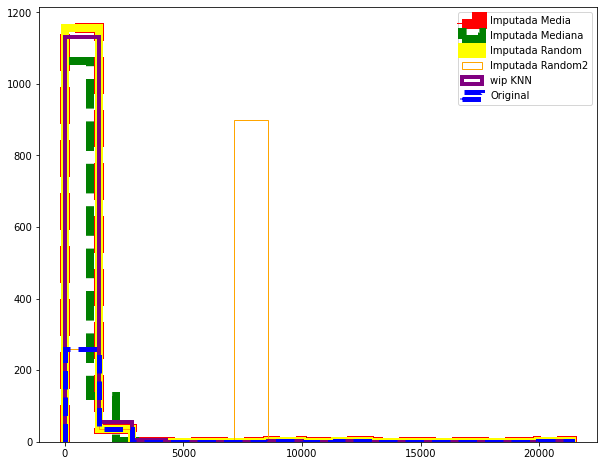

In [56]:
plt.figure(figsize=(10,8))

plt.hist(data2["wip_mean"],label="Imputada Media", color="red", histtype="step",bins=15,lw=10,linestyle="--")
plt.hist(data2["wip_median"],label="Imputada Mediana", color="green", histtype="step",bins=20,lw=8,linestyle="--")
plt.hist(data2["wip_random_fixed"],label="Imputada Random", color="yellow", histtype="step",lw=8,bins=15)
plt.hist(data2["wip_random"],label="Imputada Random2", color="orange", histtype="step",bins=15)
plt.hist(Xtrans["wip"],label="wip KNN", color="purple",histtype="step",bins=15,lw=4)
plt.hist(data["wip"],label="Original", color="blue",histtype="step",bins=15,linestyle="--",lw=5)
plt.legend()

plt.show()


Teniendo en cuenta los resultados de cada uno de los métodos para completar los datos faltantes, se observa que los métodos se alejan de los datos originales, esto explicado en su mayoría porque de la variable en cuestión falta una cantidad significativa de datos. Con base en lo anterior, seleccionaremos el método de imputación a través de la media.